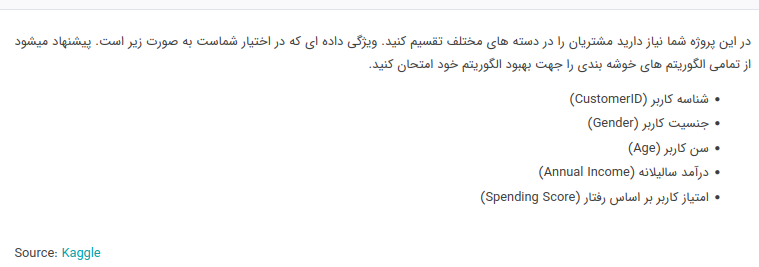

In [1]:
import numpy as np
import pandas as pd
# import scipy
# import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
# import sklearn
from mpl_toolkits.mplot3d import Axes3D 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.cm as cm
# import matplotlib
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
# import csv
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
import sklearn.utils
# import pycaret
%matplotlib inline

In [2]:
file='1632560262896716.csv'

In [3]:
df=pd.read_csv(file)

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Preprocessing

In [5]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df=df.drop('CustomerID', axis=1)

In [8]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df['Gender'] = df['Gender'].replace('Male', 0, regex=True)
df['Gender'] = df['Gender'].replace('Female', 1, regex=True)

In [10]:
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]

In [11]:
initialdf=df

In [12]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [13]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

In [14]:
X=df.values

In [15]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [16]:
X

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

# Kmeans modelling

In [17]:
df=pd.read_csv(file)

In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
df=df.drop('CustomerID',axis=1)
df['Gender'] = df['Gender'].replace('Male', 0, regex=True)
df['Gender'] = df['Gender'].replace('Female', 1, regex=True)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

In [20]:
X=df.values
X

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [21]:
from sklearn.cluster import KMeans

In [22]:
clusterNum=3
kmeans=KMeans(init='k-means++',n_clusters=clusterNum, n_init=12)
kmeans.fit(X)
labels=kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [23]:
df['clus_km']=labels
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  clus_km
0       0   19                  15                      39        0
1       0   21                  15                      81        0
2       1   20                  16                       6        0
3       1   23                  16                      77        0
4       1   31                  17                      40        0

In [24]:
df.groupby('clus_km').mean()

Gender        Age  Annual Income (k$)  Spending Score (1-100)
clus_km                                                                 
0        0.593496  40.325203           44.154472               49.829268
1        0.538462  32.692308           86.538462               82.128205
2        0.473684  40.394737           87.000000               18.631579

In [25]:
df1=df[df['clus_km']==0]
df2=df[df['clus_km']==1]
df3=df[df['clus_km']==2]

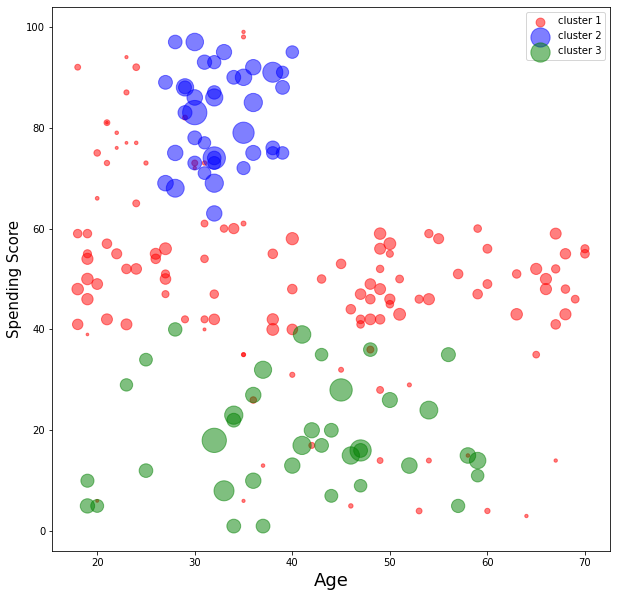

In [26]:
plt.figure(figsize=(10, 10))
def area(R):return(np.pi*(R['Annual Income (k$)'])**2)
plt.scatter(df1['Age'],df1['Spending Score (1-100)'],s=area(df1)/100, c='red',alpha=0.5)
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],s=area(df2)/100, c='blue',alpha=0.5)
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],s=area(df3)/100, c='green',alpha=0.5)
plt.legend(('cluster 1','cluster 2','cluster 3'))



plt.xlabel('Age',fontsize=18)

plt.ylabel('Spending Score',fontsize=15)

plt.show()

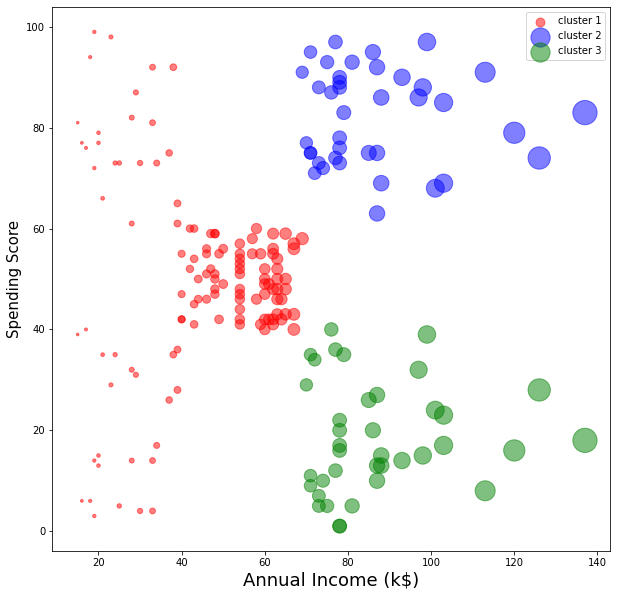

In [27]:
plt.figure( figsize=(10, 10))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],s=area(df1)/100, c='red',alpha=0.5)
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],s=area(df2)/100, c='blue',alpha=0.5)
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],s=area(df3)/100, c='green',alpha=0.5)
plt.legend(('cluster 1','cluster 2','cluster 3'))
plt.xlabel('Annual Income (k$)',fontsize=18)
plt.ylabel('Spending Score',fontsize=15)
# plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

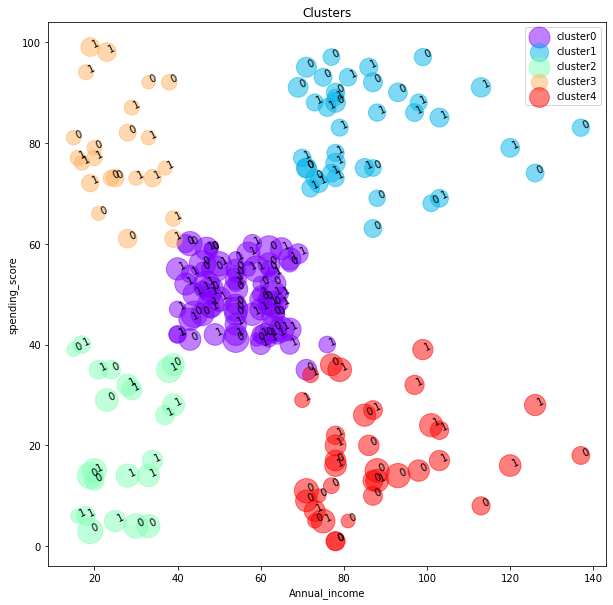

In [28]:
import matplotlib.cm as cm
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'score'},  inplace=True)
X=df.values
clusterNum=5
kmeans=KMeans(init='k-means++',n_clusters=clusterNum, n_init=20)
kmeans.fit(X)
labels=kmeans.labels_
df['clus_km']=labels
n_clusters=clusterNum
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clus_km == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

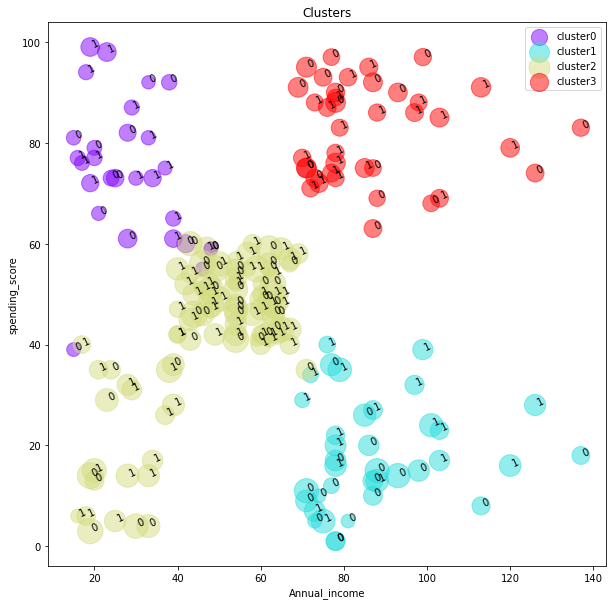

In [29]:
import matplotlib.cm as cm
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'score'},  inplace=True)
X=df.values
clusterNum=4
kmeans=KMeans(init='k-means++',n_clusters=clusterNum, n_init=80)
kmeans.fit(X)
labels=kmeans.labels_
df['clus_km']=labels
n_clusters=clusterNum
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clus_km == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

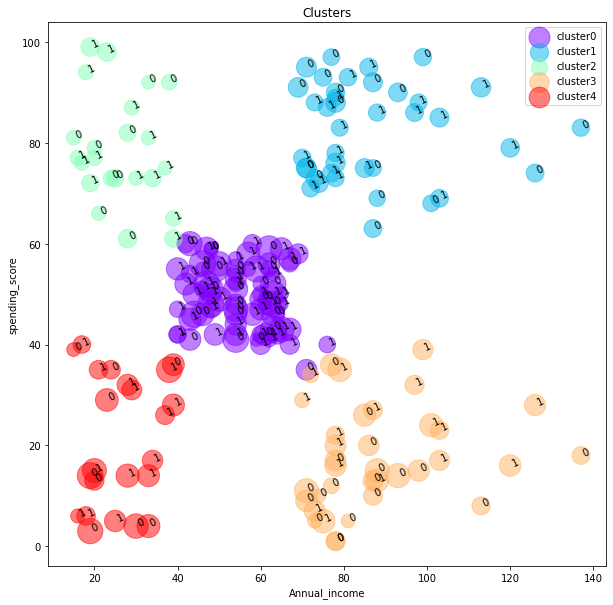

In [30]:
import matplotlib.cm as cm
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'score'},  inplace=True)
X=df.values
clusterNum=5
kmeans=KMeans(init='random',n_clusters=clusterNum, n_init=100)
kmeans.fit(X)
labels=kmeans.labels_
df['clus_km']=labels
n_clusters=clusterNum
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clus_km == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

# Hierarchical Clustering

In [31]:
df=pd.read_csv('1632560262896716.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [32]:
df= df.drop('CustomerID',axis=1)

In [33]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [34]:
df.shape

(200, 4)

In [35]:
df['Gender']=df['Gender'].replace('Male',0)
df['Gender']=df['Gender'].replace('Female',1)

In [36]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

In [37]:
df.describe()

Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000

<AxesSubplot:>

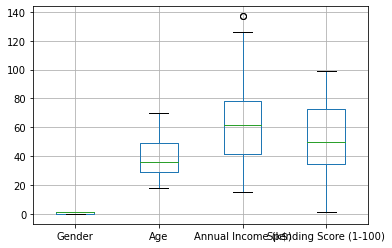

In [38]:
df.boxplot()

In [39]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [41]:
df=remove_outlier(df,'Annual Income (k$)')

<AxesSubplot:>

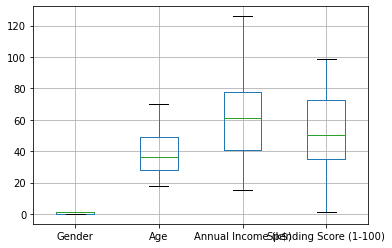

In [42]:
df.boxplot()

In [43]:
df.shape

(198, 4)

In [44]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [45]:
featureset=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
from sklearn.preprocessing import MinMaxScaler
x=featureset.values
featuremtx=MinMaxScaler().fit_transform(x)

In [47]:
featuremtx[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00900901, 0.05102041],
       [1.        , 0.09615385, 0.00900901, 0.7755102 ],
       [1.        , 0.25      , 0.01801802, 0.39795918]])

## clustering with scipy

In [48]:
import scipy
leng=featuremtx.shape[0]
D=scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j]=scipy.spatial.distance.euclidean(featuremtx[i],featuremtx[j])
D

/tmp/ipykernel_29987/4240038559.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D=scipy.zeros([leng,leng])


array([[0.        , 0.43029381, 1.05538677, ..., 1.46836152, 1.50419378,
        1.0908946 ],
       [0.43029381, 0.        , 1.25942227, ..., 1.40275281, 1.58287714,
        1.02462216],
       [1.05538677, 1.25942227, 0.        , ..., 1.23123266, 1.12409869,
        1.5864374 ],
       ...,
       [1.46836152, 1.40275281, 1.23123266, ..., 0.        , 0.55743049,
        1.00441691],
       [1.50419378, 1.58287714, 1.12409869, ..., 0.55743049, 0.        ,
        1.13261859],
       [1.0908946 , 1.02462216, 1.5864374 , ..., 1.00441691, 1.13261859,
        0.        ]])

In [49]:
import pylab
import scipy.cluster.hierarchy
z=hierarchy.linkage(D,'average')

/tmp/ipykernel_29987/3017514157.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(D,'average')


In [50]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(z,max_d,criterion='distance')
clusters

array([ 6,  6,  2,  4,  3,  4,  2,  4,  8,  4,  8,  4,  2,  4, 10,  6,  3,
        6, 10,  4, 10,  6,  2,  6,  2,  6,  3,  6,  3,  4,  8,  4,  8,  6,
        2,  4,  3,  4,  3,  4,  2,  6, 10,  3,  3,  4,  3,  3,  3,  3,  3,
        6,  3, 10,  3, 10,  3, 10,  3, 10, 10,  6,  2,  3, 10,  6,  3,  2,
        6,  3, 10,  3,  2,  2, 10,  6,  3,  6,  3,  3, 10,  6, 10,  3,  3,
       10,  3,  3,  3,  3,  2,  6, 10,  3,  3,  6,  3,  3, 10,  6,  3,  3,
       10,  6, 10,  3,  2, 10, 10, 10, 10,  3,  3,  6,  3,  3,  2,  3,  3,
        3,  6,  3,  3,  6,  3,  5, 10,  6,  9,  6,  9,  6,  3,  5,  9,  5,
        1,  6,  9,  5,  1,  6,  3,  5,  9,  6, 10,  5,  1,  6,  9,  6,  1,
        5,  1,  5,  9,  5,  9,  5,  1,  5,  9,  5,  9,  5,  9,  5,  1,  6,
        9,  6,  9,  6,  1,  5,  9,  6,  9,  6,  1,  5,  9,  5,  1,  6,  1,
        6,  1,  5,  1,  5,  9,  5,  1,  5,  1,  7], dtype=int32)

In [51]:
clusters=fcluster(z,4,criterion='distance')
clusters

array([3, 3, 1, 2, 2, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 3, 2, 3, 4, 2, 4, 3,
       1, 3, 1, 3, 2, 3, 2, 2, 4, 2, 4, 3, 1, 2, 2, 2, 2, 2, 1, 3, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 4, 3, 1, 2, 4, 3,
       2, 1, 3, 2, 4, 2, 1, 1, 4, 3, 2, 3, 2, 2, 4, 3, 4, 2, 2, 4, 2, 2,
       2, 2, 1, 3, 4, 2, 2, 3, 2, 2, 4, 3, 2, 2, 4, 3, 4, 2, 1, 4, 4, 4,
       4, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 4, 3, 4, 3, 4, 3,
       2, 2, 4, 2, 1, 3, 4, 2, 1, 3, 2, 2, 4, 3, 4, 2, 1, 3, 4, 3, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 1, 3, 4, 3, 4, 3, 1, 2,
       4, 3, 4, 3, 1, 2, 4, 2, 1, 3, 1, 3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3],
      dtype=int32)

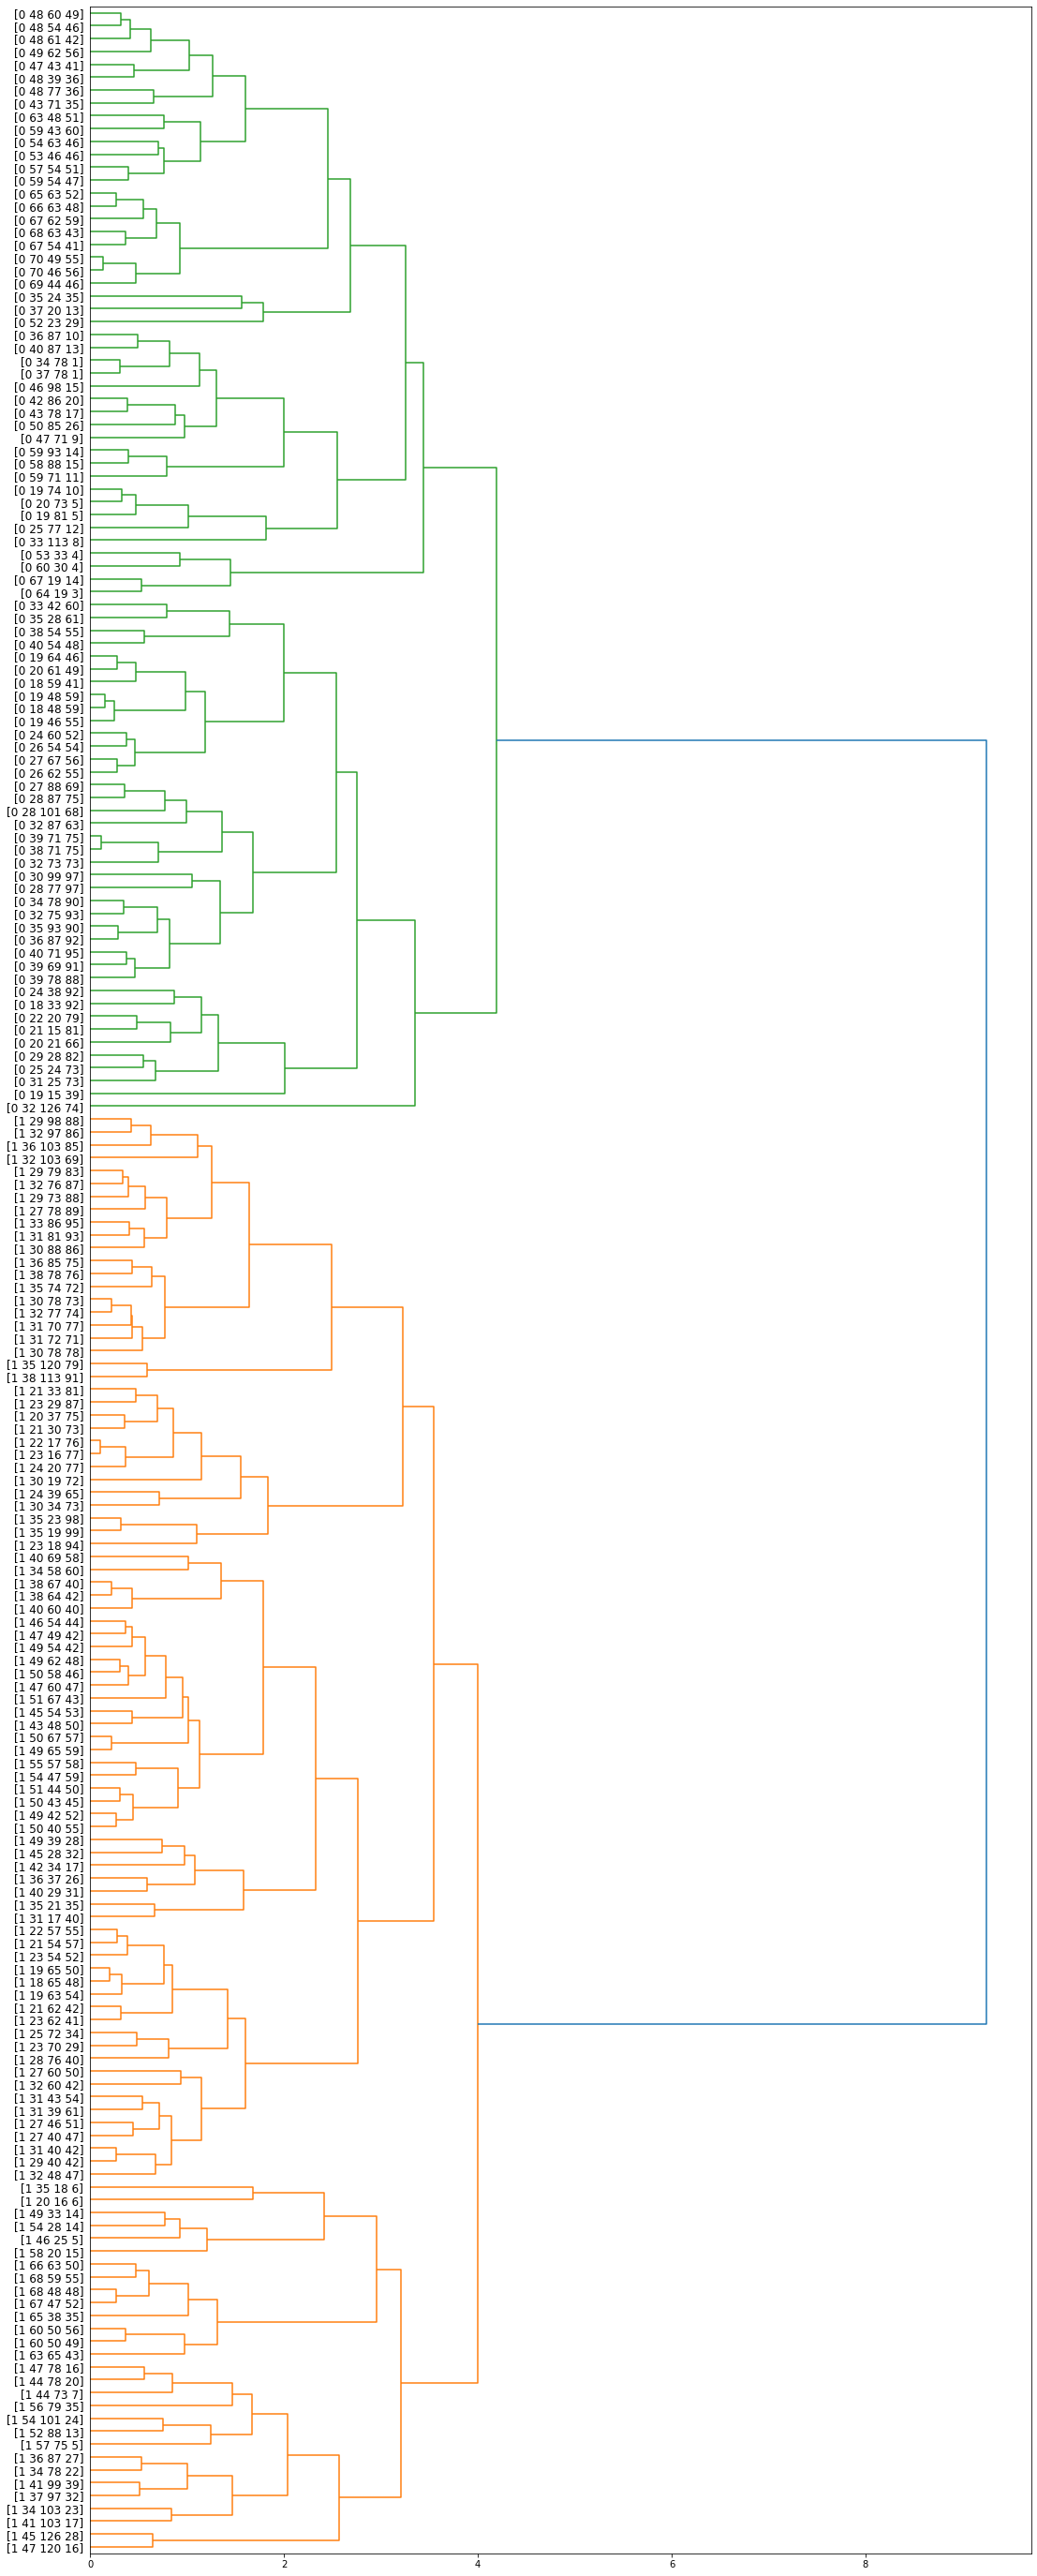

In [52]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (df['Gender'][id],df['Age'][id], df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### sklearn

In [53]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix=euclidean_distances(featuremtx,featuremtx)
distance_matrix

array([[0.        , 0.43029381, 1.05538677, ..., 1.46836152, 1.50419378,
        1.0908946 ],
       [0.43029381, 0.        , 1.25942227, ..., 1.40275281, 1.58287714,
        1.02462216],
       [1.05538677, 1.25942227, 0.        , ..., 1.23123266, 1.12409869,
        1.5864374 ],
       ...,
       [1.46836152, 1.40275281, 1.23123266, ..., 0.        , 0.55743049,
        1.00441691],
       [1.50419378, 1.58287714, 1.12409869, ..., 0.55743049, 0.        ,
        1.13261859],
       [1.0908946 , 1.02462216, 1.5864374 , ..., 1.00441691, 1.13261859,
        0.        ]])

In [54]:
zusing_distancematrix=hierarchy.linkage(distance_matrix,'average')

/tmp/ipykernel_29987/3799882293.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  zusing_distancematrix=hierarchy.linkage(distance_matrix,'average')


#### without considering Gender

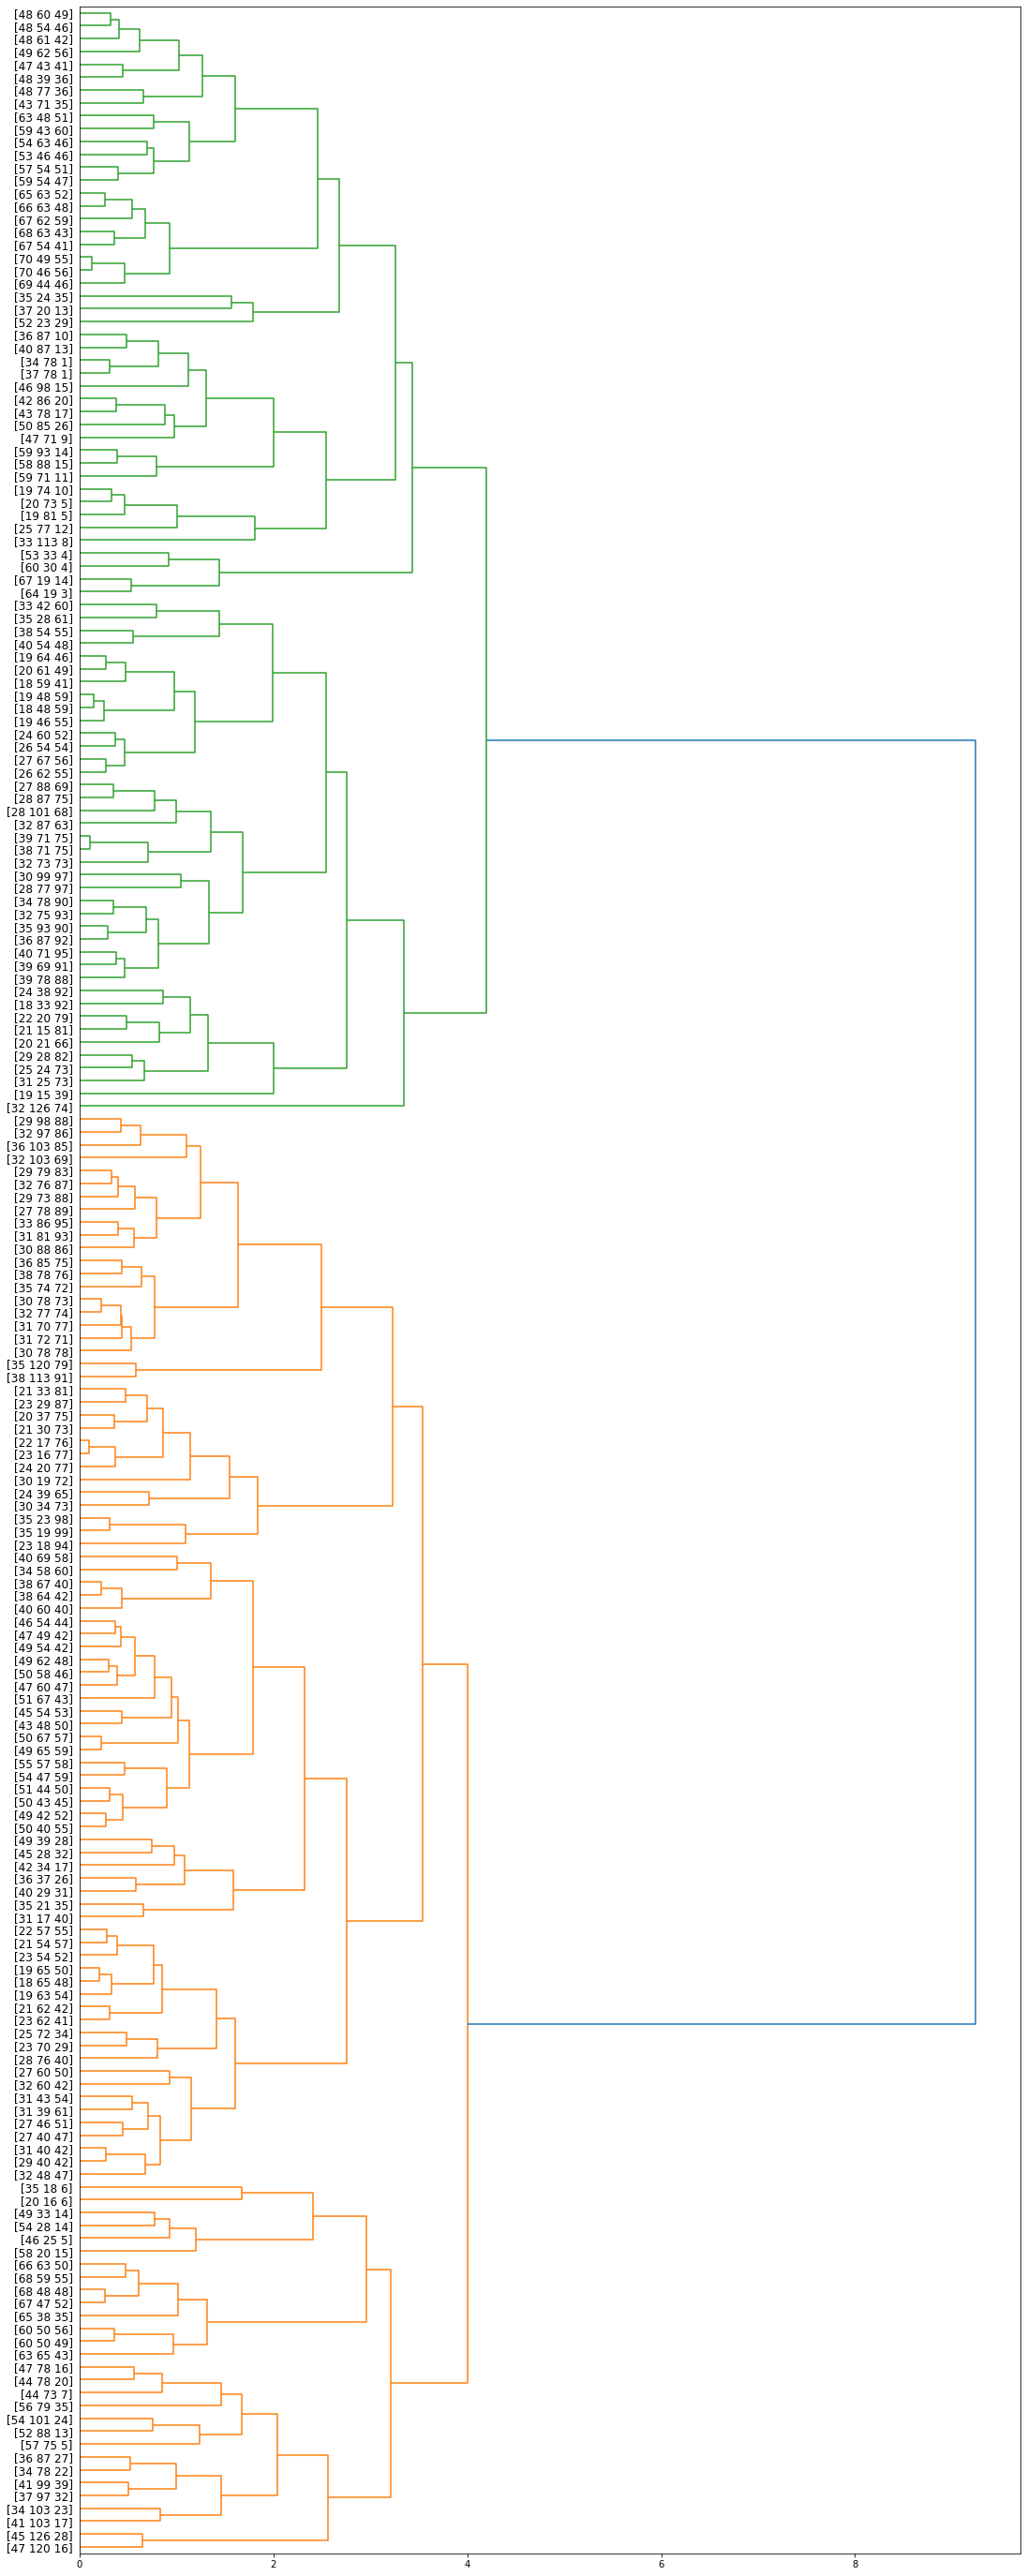

In [55]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(zusing_distancematrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Agglomerative clustering

In [65]:
agglom =AgglomerativeClustering(n_clusters=3,linkage='average')
agglom.fit(distance_matrix)
agglom.labels_

/home/amir/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2])

In [66]:
df['cluster']=agglom.labels_
df.head()

Gender  Age  Annual_income  spending_score  cluster
0       0   19             15              39        2
1       0   21             15              81        2
2       1   20             16               6        0
3       1   23             16              77        0
4       1   31             17              40        0

In [67]:
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'spending_score'},inplace=True)

In [68]:
df.head()

Gender  Age  Annual_income  spending_score  cluster
0       0   19             15              39        2
1       0   21             15              81        2
2       1   20             16               6        0
3       1   23             16              77        0
4       1   31             17              40        0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'spending_score')

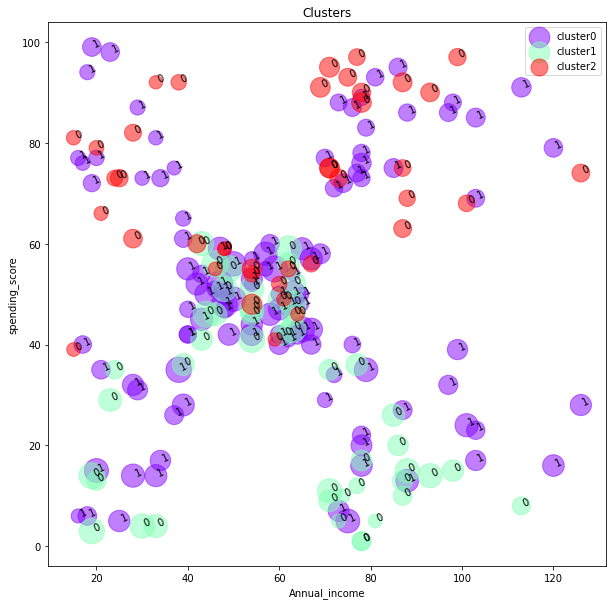

In [69]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
# n_clusters = 3
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.spending_score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.spending_score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

# DBSCN

In [70]:
df=pd.read_csv('1632560262896716.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [71]:
df=df.drop('CustomerID',axis=1)

In [72]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [73]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [74]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

In [75]:
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'score'},  inplace=True)

In [76]:
df.head()

Gender  Age  Annual_income  score
0       0   19             15     39
1       0   21             15     81
2       1   20             16      6
3       1   23             16     77
4       1   31             17     40

In [77]:
df=remove_outlier(df,'Annual_income')

<AxesSubplot:>

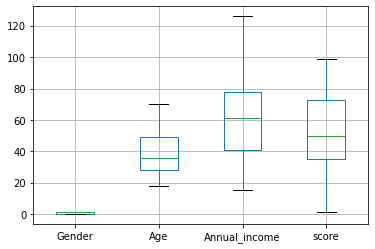

In [78]:
df.boxplot()

In [79]:
df.columns

Index(['Gender', 'Age', 'Annual_income', 'score'], dtype='object')

In [80]:
x=df[['Gender', 'Age', 'Annual_income', 'score']]
x.head()

Gender  Age  Annual_income  score
0       0   19             15     39
1       0   21             15     81
2       1   20             16      6
3       1   23             16     77
4       1   31             17     40

In [81]:
x=scaler.fit_transform(x)

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
clustering =DBSCAN(eps=0.5, min_samples=5).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))
df.head()

Gender  Age  Annual_income  score  cluster
0       0   19             15     39       -1
1       0   21             15     81       -1
2       1   20             16      6       -1
3       1   23             16     77        0
4       1   31             17     40       -1

In [84]:
clusterNum

11

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

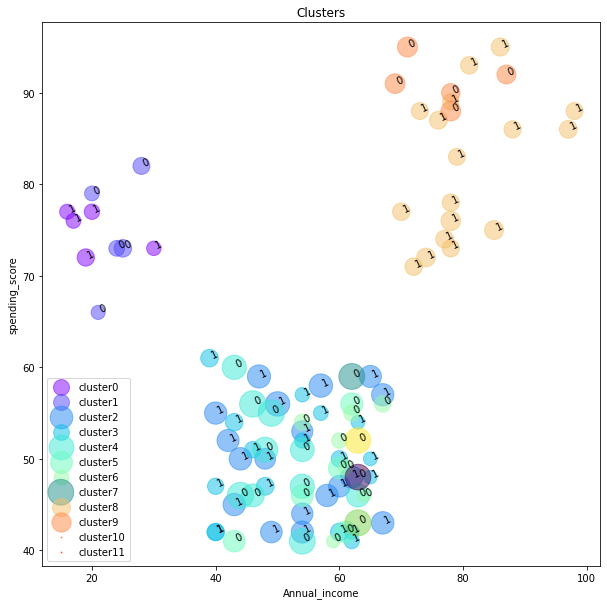

In [86]:
import matplotlib.cm as cm
n_clusters = 12
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/tmp/ipykernel_29987/1060617108.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a sing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

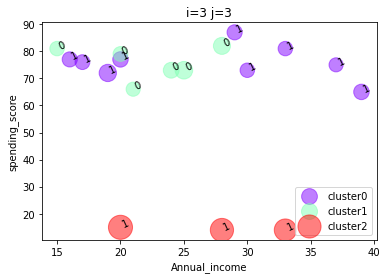

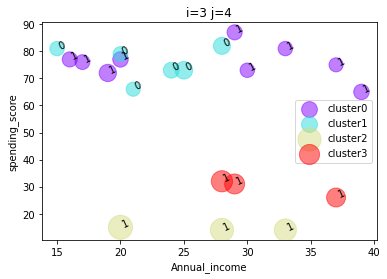

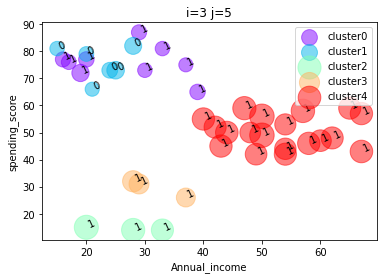

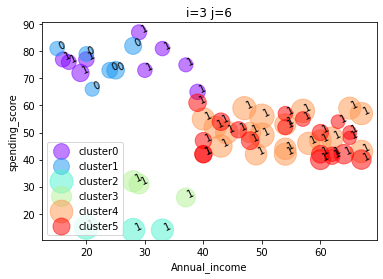

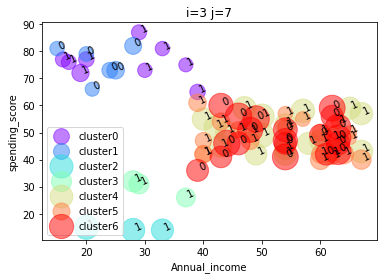

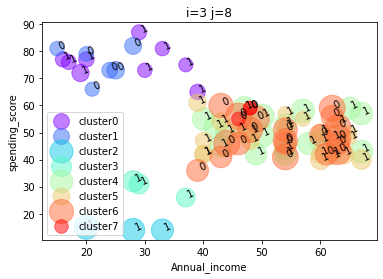

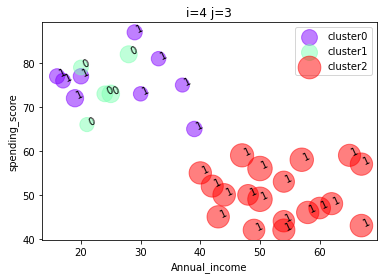

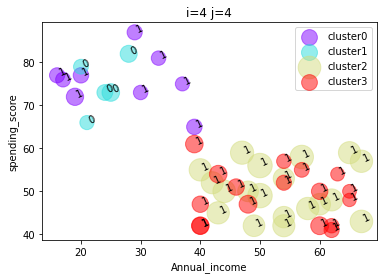

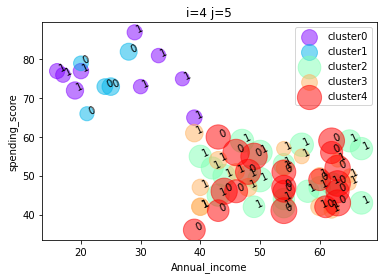

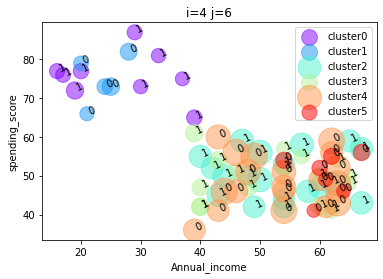

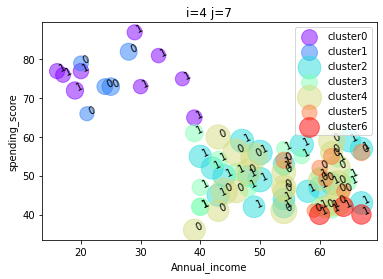

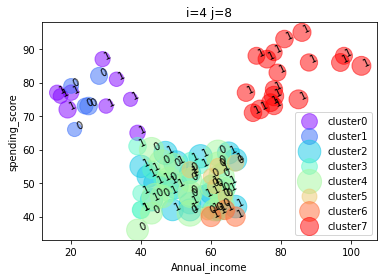

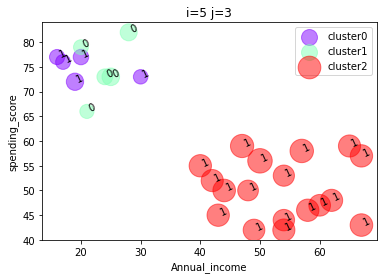

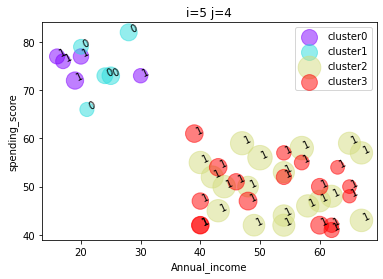

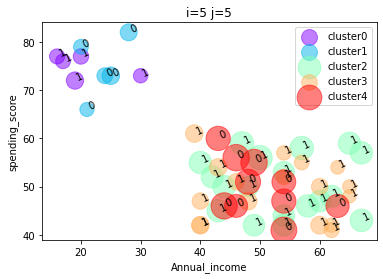

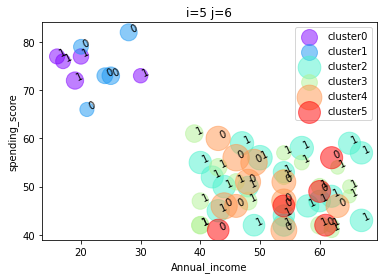

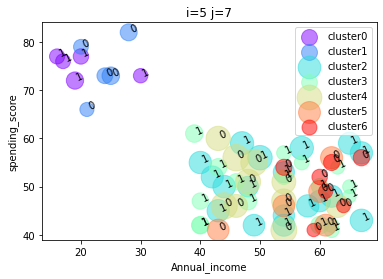

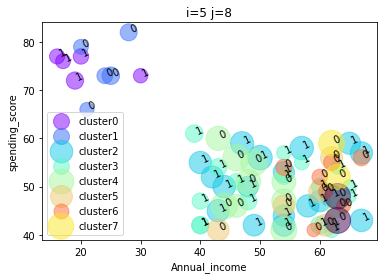

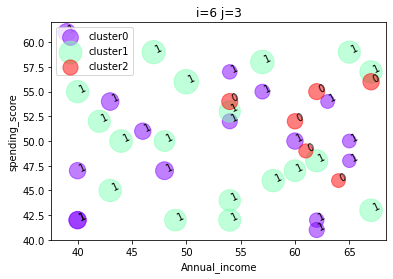

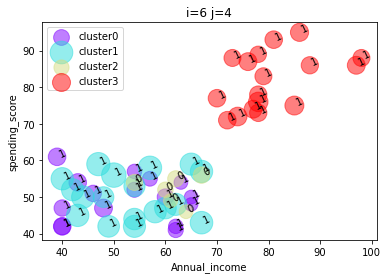

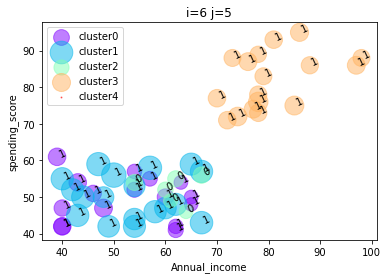

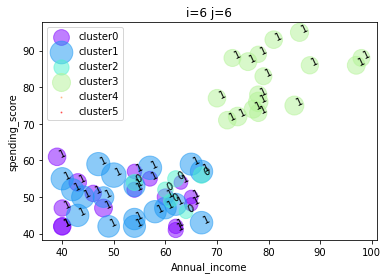

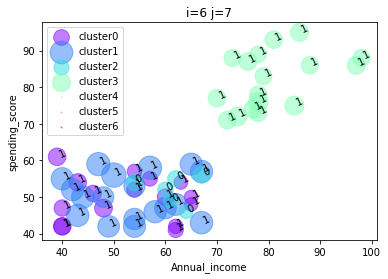

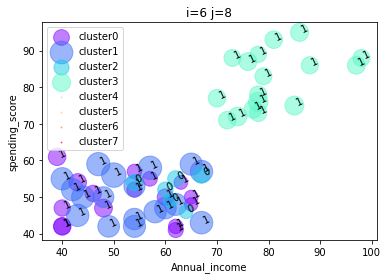

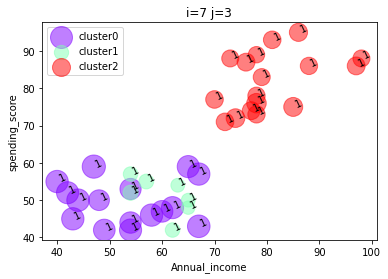

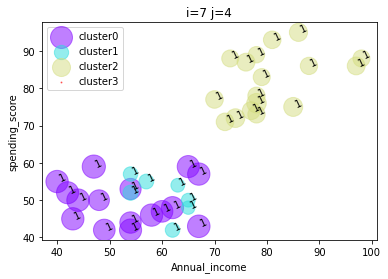

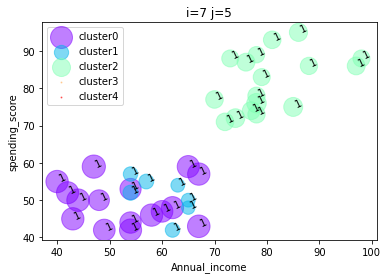

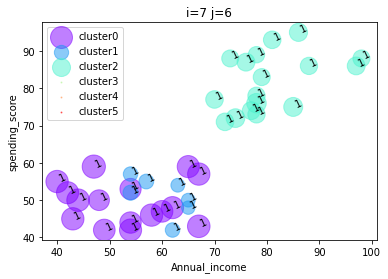

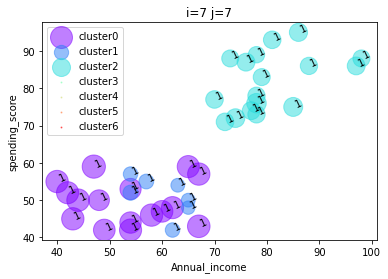

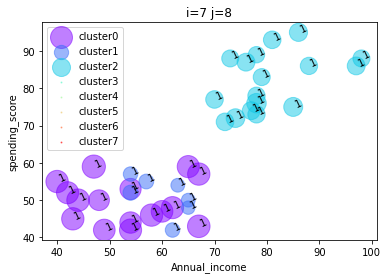

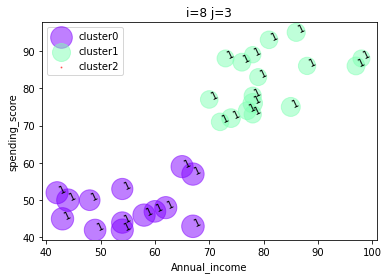

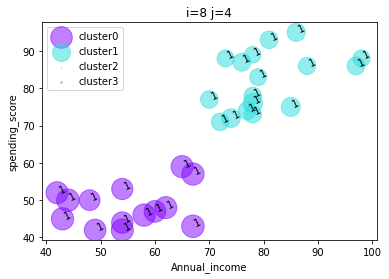

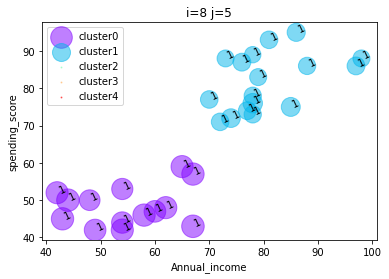

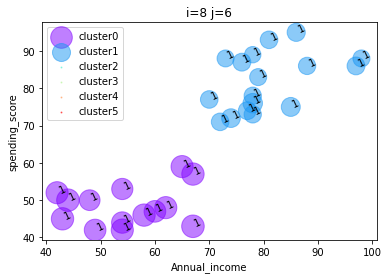

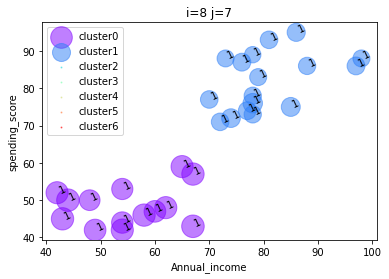

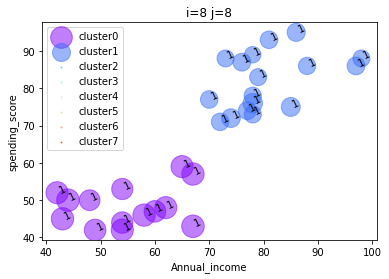

In [88]:
for j in range(3,9):
    for k in range(3,9):
        clustering =DBSCAN(eps=0.5, min_samples=j).fit(x)
        core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
        core_sample_mask[clustering.core_sample_indices_]=True
        labels=clustering.labels_
        df['cluster']=labels
        realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
        clusterNum=len(set(labels))
        n_clusters = k
        colors = cm.rainbow(np.linspace(0, 1, n_clusters))
        cluster_labels = list(range(0, n_clusters))

        plt.figure(figsize=(6,4))

        for color, label in zip(colors, cluster_labels):
            subset = df[df.cluster == label]
            for i in subset.index:
                    plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
            plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

        plt.legend()
        plt.title('i={} j={}'.format(j,k))
        plt.xlabel('Annual_income')
        plt.ylabel('spending_score')

### opted min sample and cluster numbers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

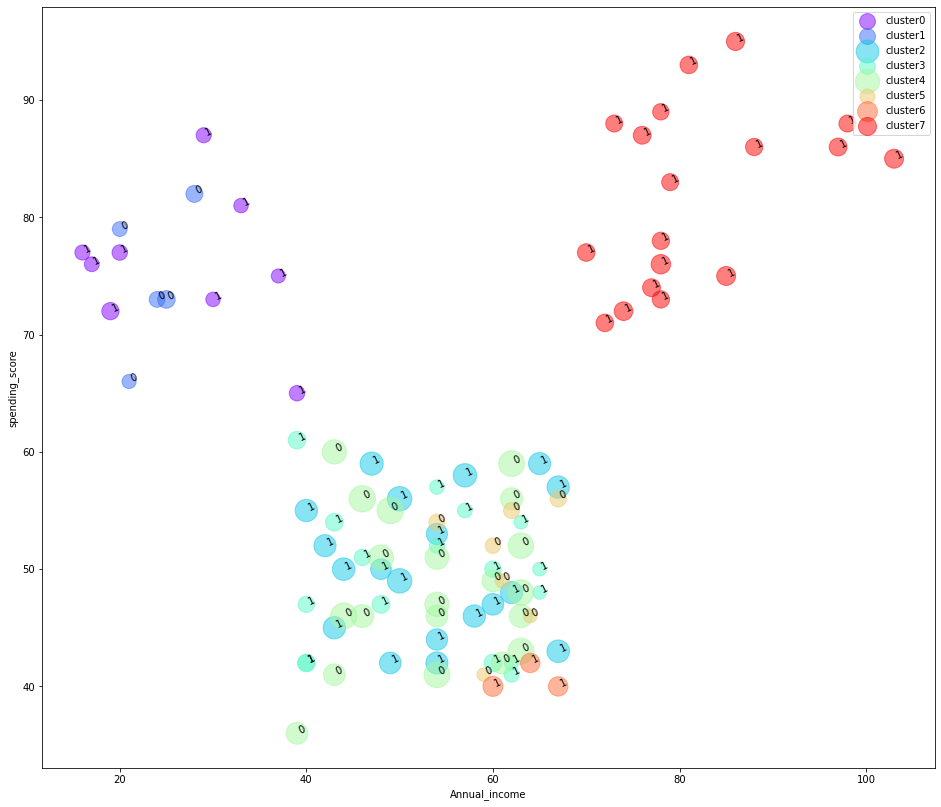

In [89]:
clustering =DBSCAN(eps=0.5, min_samples=4).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))
n_clusters = 8
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
# plt.title('i={} j={}'.format(j,k))
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


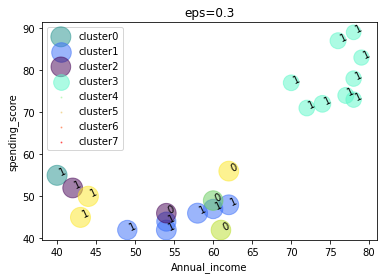

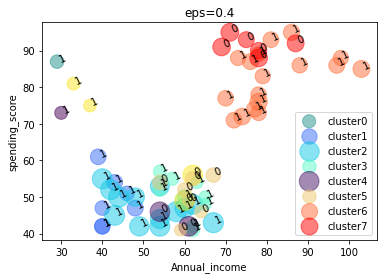

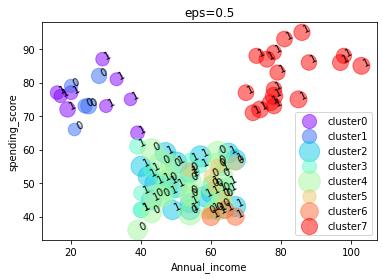

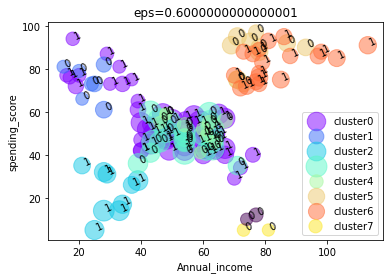

In [92]:
k=np.arange(0.3,0.7,0.1)
for epss in k:
        clustering =DBSCAN(eps=epss, min_samples=4).fit(x)
        core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
        core_sample_mask[clustering.core_sample_indices_]=True
        labels=clustering.labels_
        df['cluster']=labels
        realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
        clusterNum=len(set(labels))
        n_clusters = 8
        colors = cm.rainbow(np.linspace(0, 1, n_clusters))
        cluster_labels = list(range(0, n_clusters))

        plt.figure(figsize=(6,4))

        for color, label in zip(colors, cluster_labels):
            subset = df[df.cluster == label]
            for i in subset.index:
                    plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
            plt.scatter(subset.Annual_income, subset.score, s= subset.Age*8, c=color, label='cluster'+str(label),alpha=0.5)

        plt.legend()
        plt.title('eps={}'.format(epss))
        plt.xlabel('Annual_income')
        plt.ylabel('spending_score')

### opted parameters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

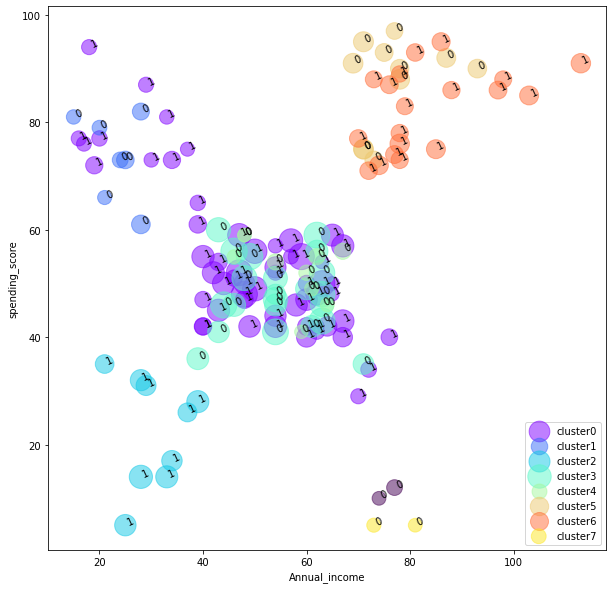

In [94]:
clustering =DBSCAN(eps=0.6, min_samples=4).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))
n_clusters = 8
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Annual_income[i], subset.score[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
# plt.title('i={} j={}'.format(j,k))
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

### without considering Gender

In [95]:
df=df.drop('Gender',axis=1)

In [96]:
df.head()

Age  Annual_income  score  cluster
0   19             15     39       -1
1   21             15     81        1
2   20             16      6       -1
3   23             16     77        0
4   31             17     40       -1

In [97]:
x=df[[ 'Age', 'Annual_income', 'score']]
x=scaler.fit_transform(x)
clustering =DBSCAN(eps=0.5, min_samples=5).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

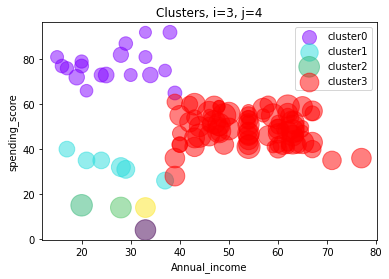

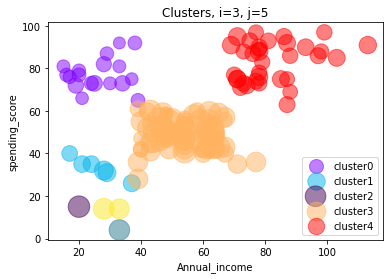

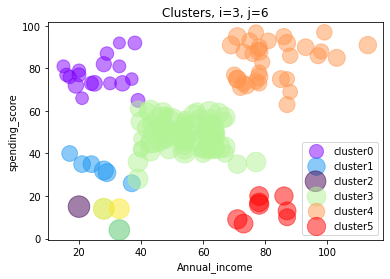

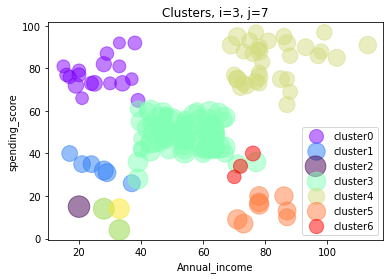

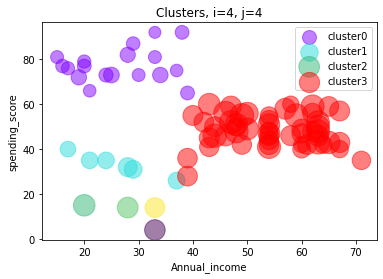

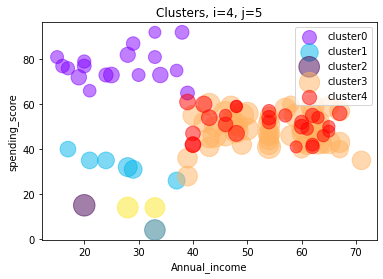

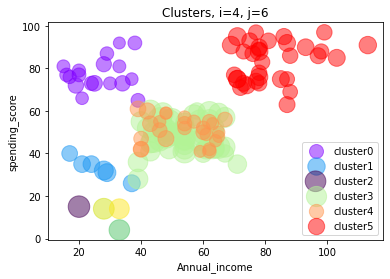

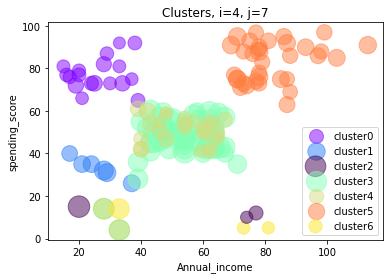

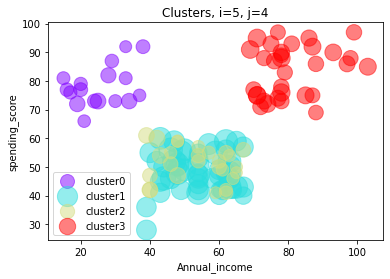

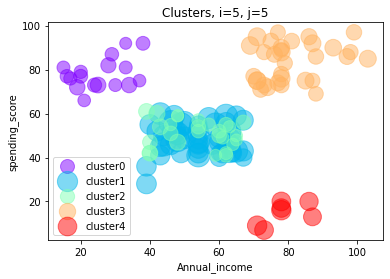

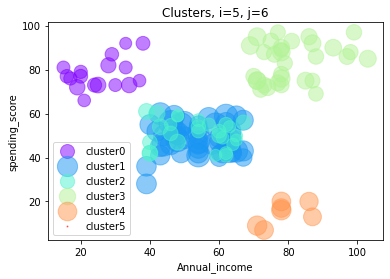

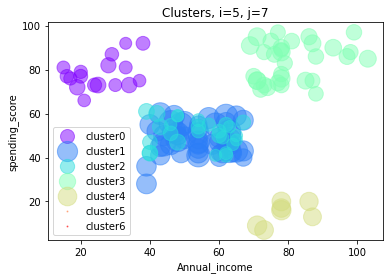

In [100]:
for i in range(3,6):
    for j in range (4,8):
        x=df[[ 'Age', 'Annual_income', 'score']]
        x=scaler.fit_transform(x)
        clustering =DBSCAN(eps=0.5, min_samples=i).fit(x)
        core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
        core_sample_mask[clustering.core_sample_indices_]=True
        labels=clustering.labels_
        df['cluster']=labels
        realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
        clusterNum=len(set(labels))
        n_clusters =j
        colors = cm.rainbow(np.linspace(0, 1, n_clusters))
        cluster_labels = list(range(0, n_clusters))

        plt.figure(figsize=(6,4))

        for color, label in zip(colors, cluster_labels):
            subset = df[df.cluster == label]
        #     for i in subset.index:
        #             plt.text(subset.Annual_income[i], subset.score[i]), rotation=25) 
            plt.scatter(subset.Annual_income, subset.score, s= subset.Age*8, c=color, label='cluster'+str(label),alpha=0.5)

        plt.legend()
        plt.title('Clusters, i={}, j={}'.format(i,j))
        plt.xlabel('Annual_income')
        plt.ylabel('spending_score')
      

### opted min_samples and cluster numbers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

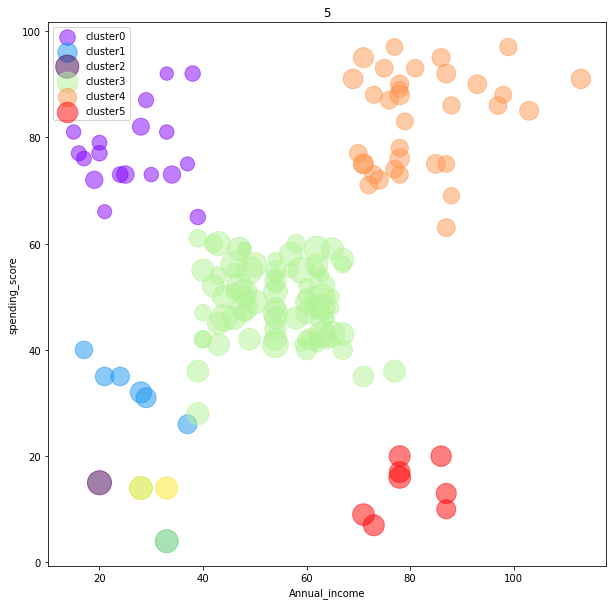

In [102]:
x=df[[ 'Age', 'Annual_income', 'score']]
x=scaler.fit_transform(x)
clustering =DBSCAN(eps=0.5, min_samples=3).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))
n_clusters =6
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
#     for i in subset.index:
#             plt.text(subset.Annual_income[i], subset.score[i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title(label)
plt.xlabel('Annual_income')
plt.ylabel('spending_score')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

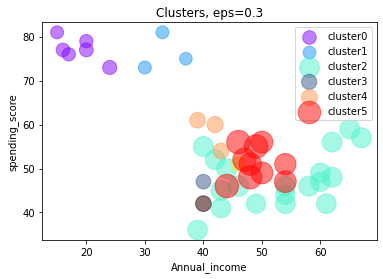

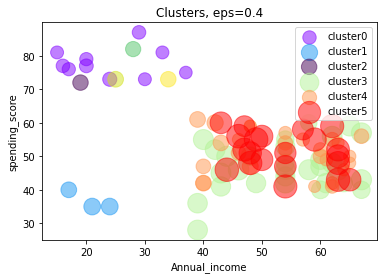

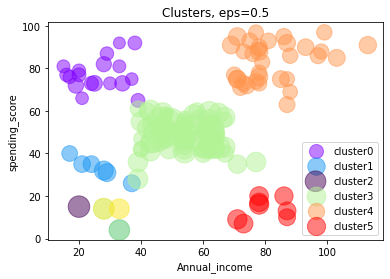

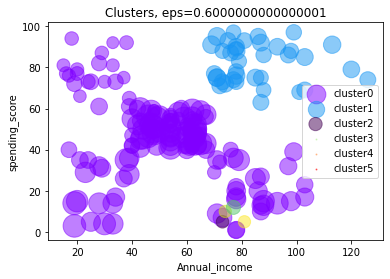

In [104]:
k=np.arange(0.3,0.7,0.1)
for epss in k:
    x=df[[ 'Age', 'Annual_income', 'score']]
    x=scaler.fit_transform(x)
    clustering =DBSCAN(eps=epss, min_samples=3).fit(x)
    core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
    core_sample_mask[clustering.core_sample_indices_]=True
    labels=clustering.labels_
    df['cluster']=labels
    realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
    clusterNum=len(set(labels))
    n_clusters =6
    colors = cm.rainbow(np.linspace(0, 1, n_clusters))
    cluster_labels = list(range(0, n_clusters))

    plt.figure(figsize=(6,4))

    for color, label in zip(colors, cluster_labels):
        subset = df[df.cluster == label]
    #     for i in subset.index:
    #             plt.text(subset.Annual_income[i], subset.score[i]), rotation=25) 
        plt.scatter(subset.Annual_income, subset.score, s= subset.Age*8, c=color, label='cluster'+str(label),alpha=0.5)

    plt.legend()
    plt.title('Clusters, eps={}'.format(epss))
    plt.xlabel('Annual_income')
    plt.ylabel('spending_score')

### opted parameters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'spending_score')

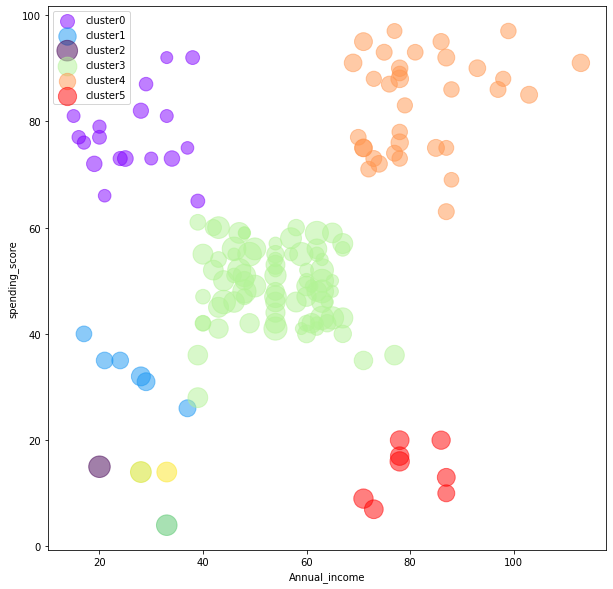

In [107]:
x=df[[ 'Age', 'Annual_income', 'score']]
x=scaler.fit_transform(x)
clustering =DBSCAN(eps=0.5, min_samples=3).fit(x)
core_sample_mask=np.zeros_like(clustering.labels_,dtype=bool)
core_sample_mask[clustering.core_sample_indices_]=True
labels=clustering.labels_
df['cluster']=labels
realclusterNum=len(set(labels))-(1 if -1 in labels else 0)
clusterNum=len(set(labels))
n_clusters =6
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
#     for i in subset.index:
#             plt.text(subset.Annual_income[i], subset.score[i]), rotation=25) 
    plt.scatter(subset.Annual_income, subset.score, s= subset.Age*8, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
# plt.title(label)
plt.xlabel('Annual_income')
plt.ylabel('spending_score')